In [2]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import plot_model
from keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

(images_train, labels_train), (images_test,labels_test) = fashion_mnist.load_data()

In [4]:
images_test.shape

(10000, 28, 28)

In [5]:
labels_train.shape

(60000,)

In [6]:
labels_train=np.array(labels_train).reshape(-1,1)
labels_test=np.array(labels_test).reshape(-1,1)
labels_test.shape

(10000, 1)

In [7]:
onehot=OneHotEncoder()

onehot.fit(labels_train)

labels_train=onehot.transform(labels_train)
labels_test=onehot.transform(labels_test)
labels_train=labels_train.toarray()
labels_test=labels_test.toarray()

In [8]:
labels_test.shape

(10000, 10)

In [9]:
np.unique(labels_test)

array([0., 1.])

In [10]:
images_train.shape

(60000, 28, 28)

In [11]:
images_test.shape

(10000, 28, 28)

In [12]:
28*28

784

In [13]:
images_train=np.array(images_train).reshape(60000,784)/255
images_test=np.array(images_test).reshape(10000,784)/255

In [14]:
images_train=images_train.reshape(60000,  28, 28,1).astype('float32')
images_test=images_test.reshape(10000, 28, 28,1).astype('float32')

In [20]:


image=Input(shape=(28,28,1))

conv1=Conv2D(32, (5, 5), activation='relu',padding='same')(image)
pool1=MaxPooling2D(pool_size=(2, 2))(conv1)

conv2=Conv2D(64, (5, 5),activation='relu',padding='same')(pool1)
pool2=MaxPooling2D(pool_size=(2, 2))(conv2)

flat_layer=Flatten()(pool2)

dense1=Dense(1024, activation='relu')(flat_layer)
drop1=Dropout(0.2)(dense1)

dense2=Dense(200, activation='relu')(drop1)
drop2=Dropout(0.2)(dense2)

output=Dense(10, activation='softmax')(drop2)

model=Model(inputs=image,outputs=output)

In [21]:
model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │     3,212,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 200)            │       205,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,471,394 (13.24 MB)

 Trainable params: 3,471,394 (13.24 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
plot_model(model)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [24]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [25]:
model.fit(images_train,labels_train,validation_data=[images_test,labels_test],
         epochs=10,batch_size=5000,verbose=1)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 631ms/step - accuracy: 0.3909 - loss: 1.7277 - val_accuracy: 0.7031 - val_loss: 0.8596
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 680ms/step - accuracy: 0.7046 - loss: 0.8071 - val_accuracy: 0.7616 - val_loss: 0.6116
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.7694 - loss: 0.6139 - val_accuracy: 0.7996 - val_loss: 0.5274
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 975ms/step - accuracy: 0.8104 - loss: 0.5129 - val_accuracy: 0.8329 - val_loss: 0.4587
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 982ms/step - accuracy: 0.8371 - loss: 0.4542 - val_accuracy: 0.8523 - val_loss: 0.4131
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 976ms/step - accuracy: 0.8561 - loss: 0.4007 - val_accuracy: 0.8625 - val_loss: 0.3814
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 976ms/step - accuracy: 0.8639 - loss: 0.3805 - val_accuracy: 0.8681 - val_loss: 0.3621
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 982ms/step - accuracy: 0.8730 - loss: 0.3514 - val_accuracy:

In [28]:
p=model.predict(images_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [51]:
labels_predicted=np.argmax(p,1)

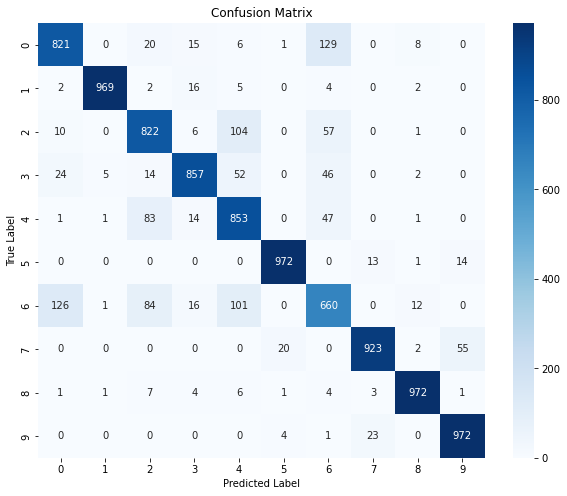

In [54]:
# If both are 1D arrays of label indices:
conf_matrix = confusion_matrix(labels_test, labels_predicted)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
